# PyTorch Workfflow Fundamental


We're going to get `torch`, `torch.nn` (`nn` stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.


In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data (preparing and loading)


In [3]:
# Create known data
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Split data into training and test sets


In [4]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend()

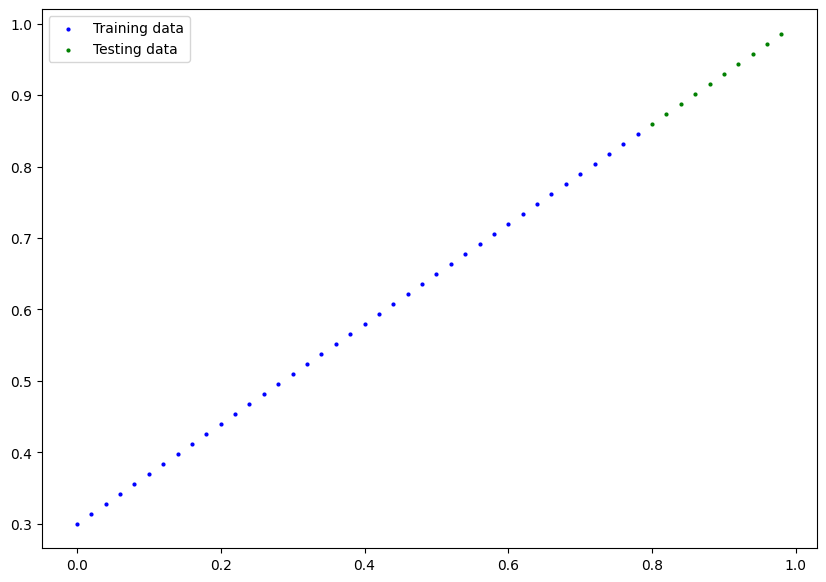

In [6]:
plot_predictions()

## 2. Build model


In [ ]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(
            1, dtype=torch.float), requires_grad=True)

        self.bias = nn.Parameter(torch.randn(
            1, dtype=torch.float), requires_grad=True)

        # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module                                                                                                | What does it do?                                                                                                                                                                                                                                                                                 |
| ------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html)                                                         | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).                                                                                                                                                                |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)) are calculated automatically, this is often referred to as "autograd". |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)           | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented.                                                |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html)                                                   | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss).                                                                                                                  |
| `def forward()`                                                                                               | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above).                                                                                          |


### Checking the contents of a PyTorch model


In [25]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(100)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameters)
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3607], requires_grad=True),
 Parameter containing:
 tensor([-0.2859], requires_grad=True)]

We can also get the state (what the model contains) of the model using [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict).


In [26]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3607])), ('bias', tensor([-0.2859]))])

Notice how the values for `weights` and `bias` from `model_0.state_dict()` come out as random float tensors?

This is because we initialized them above using `torch.randn()`.

Essentially we want to start from random parameters and get the model to update them towards parameters that fit our data best (the hardcoded `weight` and `bias` values we set when creating our straight line data).

> **Exercise:** Try changing the `torch.manual_seed()` value two cells above, see what happens to the weights and bias values.

Because our model starts with random values, right now it'll have poor predictive power.


### Making predictions using `torch.inference_mode()`

To check this we can pass it the test data `X_test` to see how closely it predicts `y_test`.


In [27]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [28]:
# Check predictions
print(f"Numbers of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predict values:\n{y_preds}")

Numbers of testing samples: 10
Number of predictions made: 10
Predict values:
tensor([[0.0026],
        [0.0098],
        [0.0170],
        [0.0242],
        [0.0315],
        [0.0387],
        [0.0459],
        [0.0531],
        [0.0603],
        [0.0675]])


Notice how there's one prediction value per testing sample.

This is because of the kind of data we're using. For our straight line, one `X` value maps to one `y` value.

However, machine learning models are very flexible. You could have 100 `X` values mapping to one, two, three or 10 `y` values. It all depends on what you're working on.

Our predictions are still numbers on a page, let's visualize them with our `plot_predictions()` function we created above.


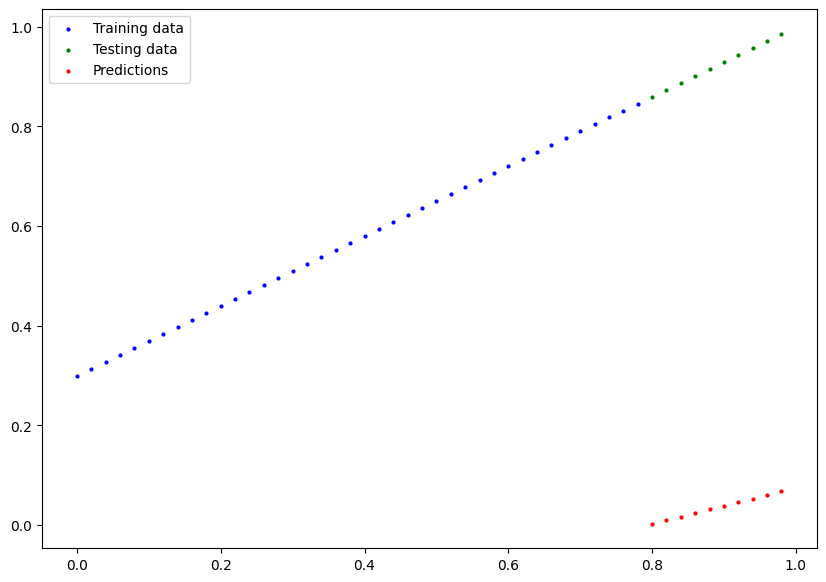

In [29]:
plot_predictions(predictions=y_preds)

In [30]:
y_test - y_preds

tensor([[0.8574],
        [0.8642],
        [0.8710],
        [0.8778],
        [0.8845],
        [0.8913],
        [0.8981],
        [0.9049],
        [0.9117],
        [0.9185]])

## 3. Train model

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to _parameters_ as patterns), the `weights` and `bias` values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

We could hard code this (since we know the default values `weight=0.7` and `bias=0.3`) but where's the fun in that?

Much of the time you won't know what the ideal parameters are for a model.

Instead, it's much more fun to write code to see if the model can try and figure them out itself.


### Creating a loss function and optimizer in PyTorch

For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a **loss function** as well as an **optimizer**.

The rolls of these are:

| Function          | What does it do?                                                                                                                 | Where does it live in PyTorch?                                                                                             | Common values                                                                                                                                                                                                                                                                                 |
| ----------------- | -------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Loss function** | Measures how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions).     | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)). |
| **Optimizer**     | Tells your model how to update its internal parameters to best lower the loss.                                                   | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)).                               |

Let's create a loss function and an optimizer we can use to help improve our model.

Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under `torch.nn.L1Loss()`) in PyTorch as our loss function.

_Mean absolute error (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples._


In [31]:
# Create loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### Creating an optimization loop in PyTorch

The training loop involves the model going through the training data and learning the relationships between the `features` and `labels`.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never sees the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.


### PyTorch training loop

For the training loop, we'll build the following steps:

| Number | Step name                                   | What does it do?                                                                                                                                                                            | Code example                      |
| ------ | ------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------- |
| 1      | Forward pass                                | The model goes through all of the training data once, performing its `forward()` function calculations.                                                                                     | `model(x_train)`                  |
| 2      | Calculate the loss                          | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.                                                                                 | `loss = loss_fn(y_pred, y_train)` |
| 3      | Zero gradients                              | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.                                                      | `optimizer.zero_grad()`           |
| 4      | Perform backpropagation on the loss         | Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards". | `loss.backward()`                 |
| 5      | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them.                                                                                | `optimizer.step()`                |


In [ ]:
torch.manual_seed(42)

# Set the numbers of epoches (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # Training
    # Put model in training mode (this is te default state of  a model)
    model_0.train()

    # 1- Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)

    # 2- Calculate the loss (how different are out models predictions on the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3- Zero grad the optimizer
    optimizer.zero_grad()

    # 4- Loss backwards
    loss.backward()

    # 5- Progress the optimizer
    optimizer.step()

    # Testing
    model_0.eval()

    with torch.inference_mode():
        # 1- Forward pass on test data
        test_pred = model_0(X_test)

        # 2- Calculate the loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(
                f"Epoch: {epoch} | Train Loss: {loss:.4f} | MAE Test Loss: {test_loss:.4f}")

Epoch: 0 | Train Loss: 0.7183 | MAE Test Loss: 0.8745
Epoch: 10 | Train Loss: 0.6031 | MAE Test Loss: 0.7398
Epoch: 20 | Train Loss: 0.4878 | MAE Test Loss: 0.6050
Epoch: 30 | Train Loss: 0.3726 | MAE Test Loss: 0.4703
Epoch: 40 | Train Loss: 0.2574 | MAE Test Loss: 0.3356
Epoch: 50 | Train Loss: 0.1422 | MAE Test Loss: 0.2009
Epoch: 60 | Train Loss: 0.0304 | MAE Test Loss: 0.0709
Epoch: 70 | Train Loss: 0.0159 | MAE Test Loss: 0.0371
Epoch: 80 | Train Loss: 0.0125 | MAE Test Loss: 0.0282
Epoch: 90 | Train Loss: 0.0091 | MAE Test Loss: 0.0206


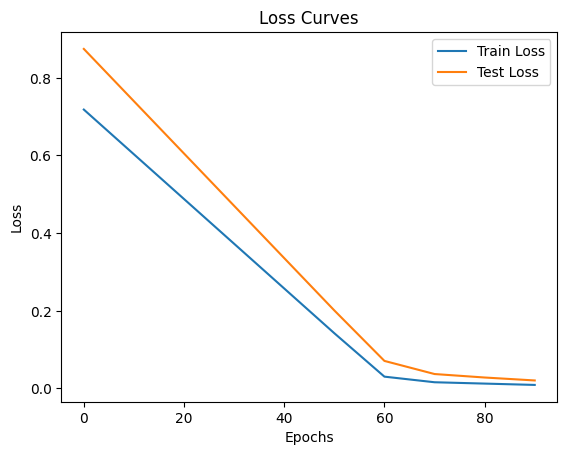

In [33]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [34]:
# Find the model's learned parameters
print(f"The model learned the following values for weights and bias:")
print(model_0.state_dict())

print(f"\nAnd the original values for weights and bias are:")
print(f"Weights: {weight}, Bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6719]), 'bias': tensor([0.3116])})

And the original values for weights and bias are:
Weights: 0.7, Bias: 0.3


## 4. Making predictions with a trained PyTorch model (inference)


In [35]:
# 1- Set the model in evaluation mode
model_0.eval()

# 2- Setup the inference mode context manager
with torch.inference_mode():
    # 3- Make sure the calculations are done with the model and data on the same device
    y_preds = model_0(X_test)

y_preds

tensor([[0.8491],
        [0.8626],
        [0.8760],
        [0.8894],
        [0.9029],
        [0.9163],
        [0.9298],
        [0.9432],
        [0.9566],
        [0.9701]])

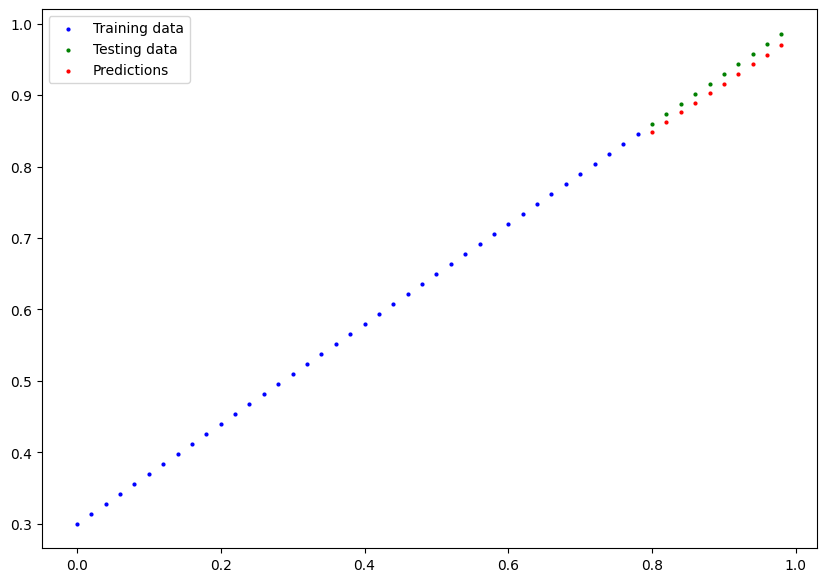

In [36]:
plot_predictions(predictions=y_preds)

## 5. Saving and loading a PyTorch model


In [37]:
from pathlib import Path

# 1- Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2- Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3- Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_0.pth


In [38]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r--@ 1 zhouwende  staff  2117 Jan 26 14:26 models/01_pytorch_workflow_model_0.pth


### Loading a saved PyTorch model's `state_dict()`


In [39]:
# Instantiate a new instance of  the model (this will be instatiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of the saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [40]:
# 1- Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2- Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [42]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together


In [43]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [44]:
# ================
# 1- Get the data
# ===============

# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# See
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split the data
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# See
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

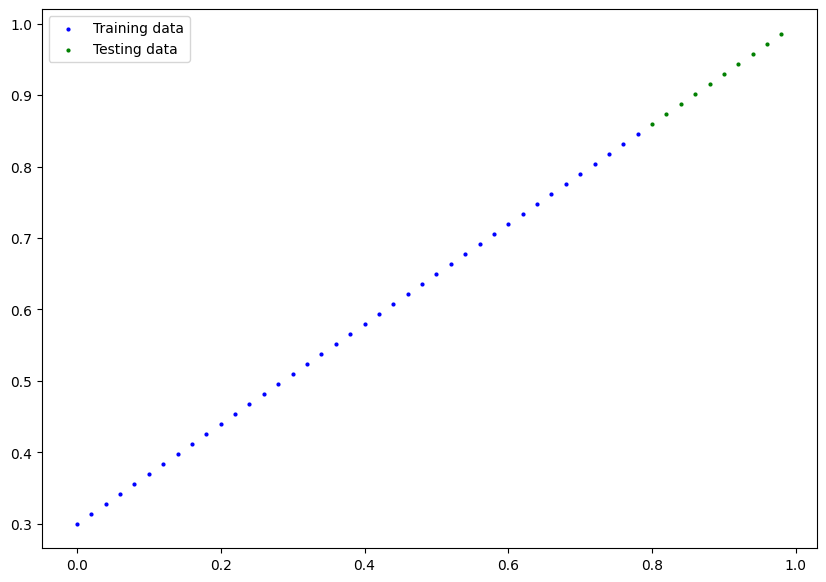

In [46]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
# ================
# 2- Build the linear model
# ================

# Subclass nn.Module to make the model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


# Set the manual seed when creating the model (this isn't always needed but is used for demostrative purposes)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# ================
# 3- Training
# ================

# Create loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [49]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [50]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set model to GPU if it's available, otherwise it'll default to CPU
# the device variable was set above to be "cuda" if available or "cpu" if not
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
torch.manual_seed(42)

# Set the numbers of epochs
epochs = 100

# Put the data on the available device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # Training
    model_1.train()

    # 1- Forward pass
    y_preds = model_1(X_train)

    # 2- Calculate the loss
    loss = loss_fn(y_preds, y_train)

    # 3- Optimizer zero grad
    optimizer.zero_grad()

    # 4- Backward pass
    loss.backward()

    # 5- Step the optimizer
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_preds = model_1(X_test)
        test_loss = loss_fn(test_preds, y_test)

    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")

Epoch: 0 | Train Loss: 0.5552 | Test Loss: 0.5740
Epoch: 10 | Train Loss: 0.4400 | Test Loss: 0.4393
Epoch: 20 | Train Loss: 0.3248 | Test Loss: 0.3046
Epoch: 30 | Train Loss: 0.2095 | Test Loss: 0.1698
Epoch: 40 | Train Loss: 0.0943 | Test Loss: 0.0351
Epoch: 50 | Train Loss: 0.0239 | Test Loss: 0.0478
Epoch: 60 | Train Loss: 0.0200 | Test Loss: 0.0458
Epoch: 70 | Train Loss: 0.0165 | Test Loss: 0.0375
Epoch: 80 | Train Loss: 0.0131 | Test Loss: 0.0299
Epoch: 90 | Train Loss: 0.0097 | Test Loss: 0.0217


In [55]:
# Find our model's learned parameters
from pprint import pprint
print(f"The model learned the following values for wieghts and bias:")
pprint(model_1.state_dict())
print(f"\nThe original values for weights and bias are:")
print(f"Weights: {weight}, Bias: {bias}")

The model learned the following values for wieghts and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6691]])),
             ('linear_layer.bias', tensor([0.3130]))])

The original values for weights and bias are:
Weights: 0.7, Bias: 0.3


In [ ]:
# ================
# 4- Predictions
# ================

# 1- Turn model to evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8483],
        [0.8617],
        [0.8750],
        [0.8884],
        [0.9018],
        [0.9152],
        [0.9286],
        [0.9420],
        [0.9553],
        [0.9687]])

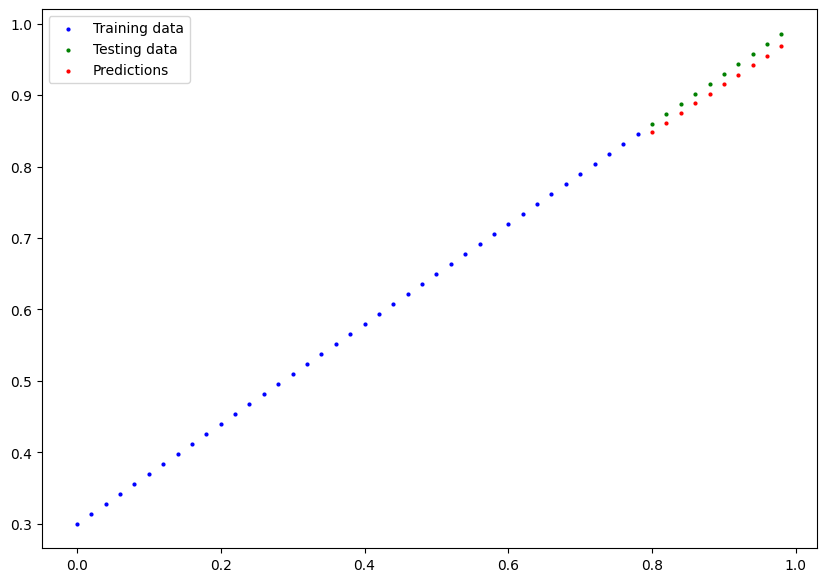

In [57]:
# See
plot_predictions(predictions=y_preds)

In [ ]:
# ================
# 5- Saving and loading a model
# ================

from pathlib import Path

# 1- Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2- Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3- Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_1.pth


In [59]:
# Instantiate a fresh instance of LinearRegressionV2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#  Put the model to target device
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [60]:
# Evaluate the loaded model
loaded_model_1.eval()

with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [79]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# ================
# Exercises
# ================

# ================
# Create a straight line dataset using the linear regression formula (weight * X + bias).
# ================

# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

# Create weight and bias
weight = 0.3
bias = 0.9

# Create range values
start = 0
end = 10
step = 0.02

# Create X and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# See
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")

Number of X samples: 500
Number of y samples: 500


In [ ]:
# Split the data into 80% training, 20% testing.
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# See!
len(X_train), len(X_test), len(y_train), len(y_test)

(400, 100, 400, 100)

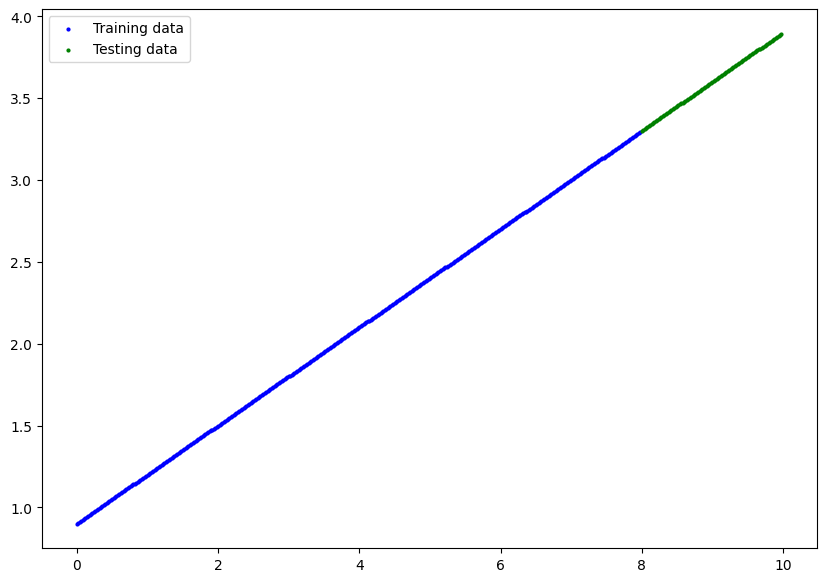

In [66]:
# Plot the training and testing data so it becomes visual.
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
# ================
# Build a PyTorch model by subclassing nn.Module.
# ================

# Inside should be a randomly initialized nn.Parameter) with requires _grad=True, one for weights and one for bias.
class LinearRegressionModelFinal(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(
            1, requires_grad=True, dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(
            1, requires_grad=True, dtype=torch.float))

    # Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


# Make an instance of it and check its state_dict()
torch.manual_seed(42)
final_model = LinearRegressionModelFinal()
final_model, final_model.state_dict()

(LinearRegressionModelFinal(),
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [81]:
next(final_model.parameters()).device

device(type='cpu')

In [83]:
# Instantiate the model and put it to the target device
final_model.to(device)
list(final_model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [68]:
# ================
# Create a loss function and optimizer using nn.L1Loss() and (torch.optim.SGD(params, Ir) respectively.
# ================

# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=final_model.parameters(), lr=0.01)

In [ ]:
# Write a training loop to perform the appropriate training steps for 300 epochs.
torch.manual_seed(42)

epochs = 300

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # Training
    final_model.train()

    # Forward pass
    y_pred = final_model(X_train)

    # Calculate loss
    loss = loss_fn(y_pred, y_train)

    # Zero grad optimizer
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

    # Testing
    final_model.eval()

    # Forward pass
    with torch.inference_mode():
        test_pred = final_model(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # The training loop should test the model on the test dataset every 20 epochs.
    if epoch % 20 == 0:
        final_model.eval()
        with torch.inference_mode():
            y_preds = final_model(X_test)
            test_loss = loss_fn(y_preds, y_test)
            print(
                f"Epoch: {epoch} | Train Loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 20 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 40 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 60 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 80 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 100 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 120 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 140 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 160 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 180 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 200 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 220 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 240 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 260 | Train Loss: 0.625 | Test loss: 0.441
Epoch: 280 | Train Loss: 0.625 | Test loss: 0.441


In [ ]:
# ================
# Make predictions with the trained model on the test data.
# ================

# Evaluation Mode
final_model.eval()

# Make predictions
with torch.inference_mode():
    y_preds = final_model(X_test)

# See!
y_preds[:10]

tensor([[3.2921],
        [3.2981],
        [3.3041],
        [3.3101],
        [3.3162],
        [3.3222],
        [3.3282],
        [3.3342],
        [3.3402],
        [3.3462]])

In [85]:
y_preds.cpu()

tensor([[2.8223],
        [2.8291],
        [2.8358],
        [2.8425],
        [2.8493],
        [2.8560],
        [2.8627],
        [2.8695],
        [2.8762],
        [2.8829],
        [2.8897],
        [2.8964],
        [2.9031],
        [2.9099],
        [2.9166],
        [2.9233],
        [2.9301],
        [2.9368],
        [2.9435],
        [2.9503],
        [2.9570],
        [2.9637],
        [2.9705],
        [2.9772],
        [2.9839],
        [2.9907],
        [2.9974],
        [3.0041],
        [3.0109],
        [3.0176],
        [3.0243],
        [3.0311],
        [3.0378],
        [3.0445],
        [3.0513],
        [3.0580],
        [3.0647],
        [3.0715],
        [3.0782],
        [3.0850],
        [3.0917],
        [3.0984],
        [3.1052],
        [3.1119],
        [3.1186],
        [3.1254],
        [3.1321],
        [3.1388],
        [3.1456],
        [3.1523],
        [3.1590],
        [3.1658],
        [3.1725],
        [3.1792],
        [3.1860],
        [3

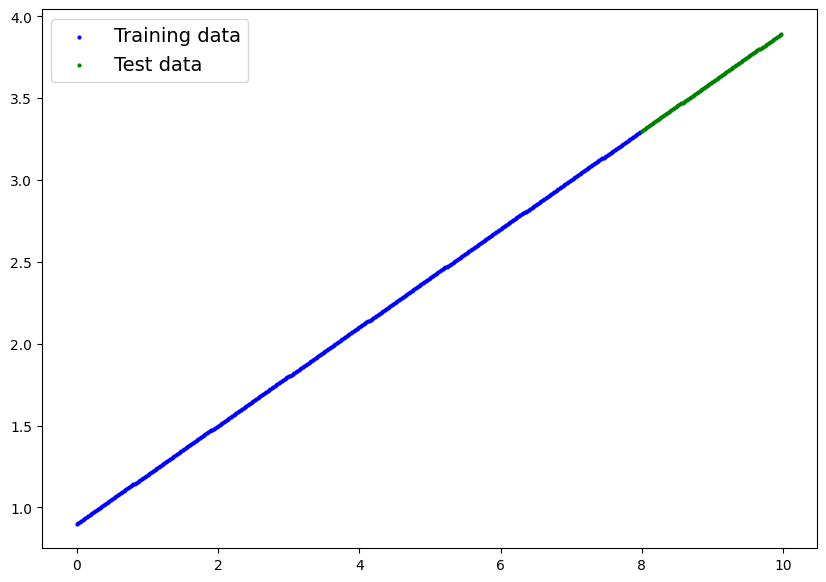

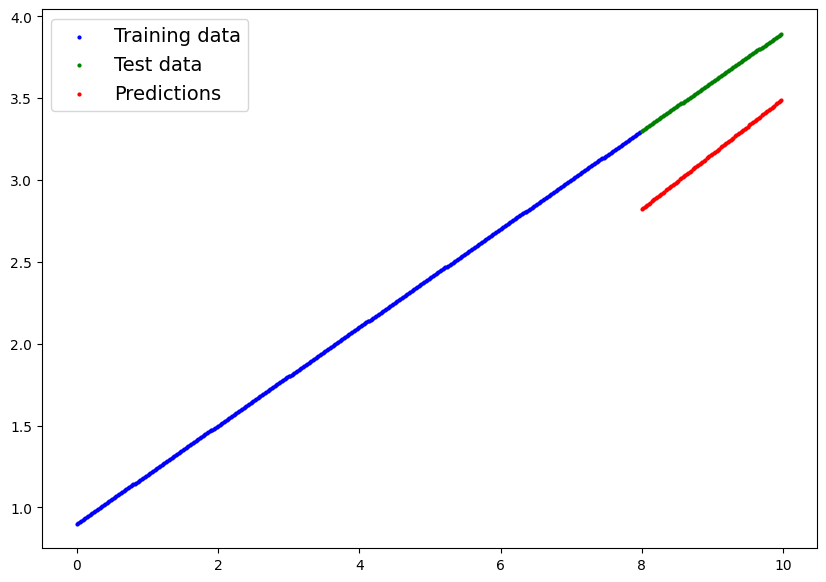

In [ ]:
# Visualize these predictions against the original training and testing data

# Plot the training and testing data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
    plt.legend(prop={"size": 14})


plot_predictions()

plot_predictions(predictions=y_preds.cpu())